In [205]:
import geopandas as gdp

from shapely.geometry import Point
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
import pandas as pd
import seaborn as sns

import folium
import contextily as cx


# ==============================================================================
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [3]:
def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker = f'${_}$',
            ax = ax
        )

Cleaning Data

In [110]:
iv = pd.read_csv('/home/camilocorredor/DS_P/Spatial_cluster/Carbones_de_Colombia:_Clasificación_ASTM.csv')


In [50]:
iv.shape

(186, 25)

In [111]:
iv.dtypes

X             float64
Y             float64
FID             int64
Referencia     object
Año             int64
Longitud      float64
Latitud       float64
Municipio      object
Departamen     object
Zona_Carbo     object
Manto          object
Espesor        object
Cenizas__     float64
SO3_bs___e    float64
C_Fijo_Cal    float64
S_bs___en     float64
C_Fijo_he_    float64
Cenizas_he     object
S_he___en     float64
C_Fijo_lmm    float64
Materia_Vo    float64
Poder_Calo    float64
Poder_Ca_1    float64
Poder_Ca_2    float64
CLASIFICAC     object
dtype: object

In [112]:
iv.isnull().sum()

X              0
Y              0
FID            0
Referencia     0
Año            0
Longitud       0
Latitud        0
Municipio      0
Departamen     0
Zona_Carbo     0
Manto          0
Espesor       15
Cenizas__      0
SO3_bs___e     0
C_Fijo_Cal     0
S_bs___en      0
C_Fijo_he_     0
Cenizas_he     0
S_he___en      0
C_Fijo_lmm     0
Materia_Vo     0
Poder_Calo     0
Poder_Ca_1     0
Poder_Ca_2     0
CLASIFICAC     0
dtype: int64

In [128]:
Dep = pd.DataFrame(iv.groupby(by = 'Departamen', as_index=False).size())
Dep

,Departamen,size
0,Boyacá,84
1,Norte de Santander,81
2,Valle del Cauca,21


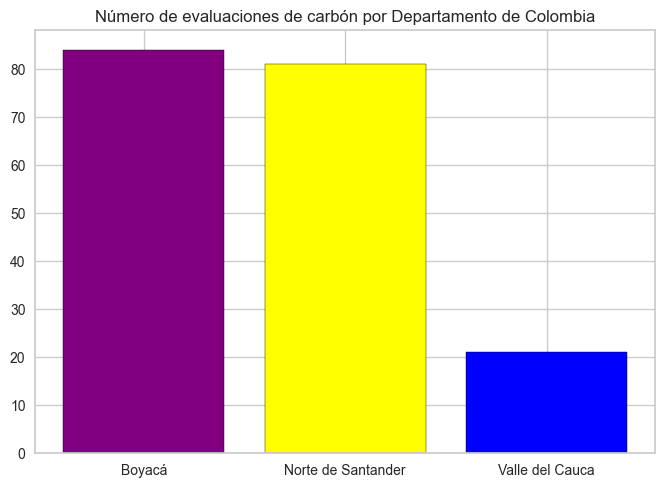

In [143]:
y_pos = np.arange(len(list(Dep['size'])))
# Create bars
plt.bar(y_pos, list(Dep['size']), color=['purple','yellow','blue'],  edgecolor='black')
# Create names on the x-axis
plt.xticks(y_pos, Dep['Departamen'], rotation = 'horizontal')
plt.title('Número de evaluaciones de carbón por Departamento de Colombia')

plt.show()

In [113]:
Mun = pd.DataFrame(iv.groupby(by='Municipio',as_index=False).size())
height = (list(Mun['Municipio']))
bars = list(Mun['size'])

In [120]:
height

['Arboledas',
 'Beteitiva',
 'Buenos Aires',
 'Cali',
 'Chivata',
 'Corrales',
 'Cucaita',
 'Gameza',
 'Gámeza',
 'Iza',
 'Jamundí',
 'Mongua',
 'Motavita',
 'Paipa',
 'Paz Del Rio',
 'Salázar',
 'San Cayetano',
 'Sardinata',
 'Sativasur',
 'Socha',
 'Sogamoso',
 'Tasco',
 'Topaga',
 'Tuta',
 'Zulia']

In [121]:
print(iv.loc[iv['Municipio']=='Gámeza'].shape)
print(iv.loc[iv['Municipio']=='Gameza'].shape)

(8, 25)
(0, 25)


In [122]:
iv = iv.replace(['Gameza'], 'Gámeza')

In [123]:
print(iv.loc[iv['Municipio']=='Gámeza'].shape)
print(iv.loc[iv['Municipio']=='Gameza'].shape)

(8, 25)
(0, 25)


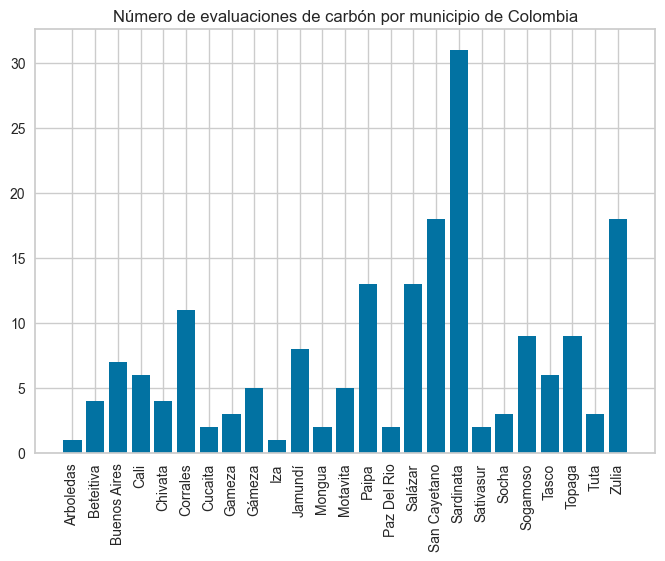

In [126]:
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, bars)
# Create names on the x-axis
plt.xticks(y_pos, height, rotation = 'vertical')
plt.title('Número de evaluaciones de carbón por municipio de Colombia')

plt.show()

In [216]:
pd.DataFrame(iv.groupby(['Municipio','Manto']).size())
# query1= pd.DataFrame(dataframe.groupby(['TIPO_INCIDENTE','PRIORIDAD FINAL']).size()).unstack()

0
Municipio Manto                
Arboledas Manto 60            1
Beteitiva Manto-3             1
          Manto-5 (La Dura)   1
          Manto-6 (El Peine)  1
          Manto-7 (Eleazar)   1
...                          ..
Zulia     Manto 50            1
          Manto 60            1
          Manto La Parida     1
          Manto inferior      1
          Manto superior      1

[144 rows x 1 columns]

In [201]:
gdf = gdp.GeoDataFrame(iv, geometry=gdp.points_from_xy(iv.Longitud, iv.Latitud))
gdf = gdf.to_crs(epsg=3857)

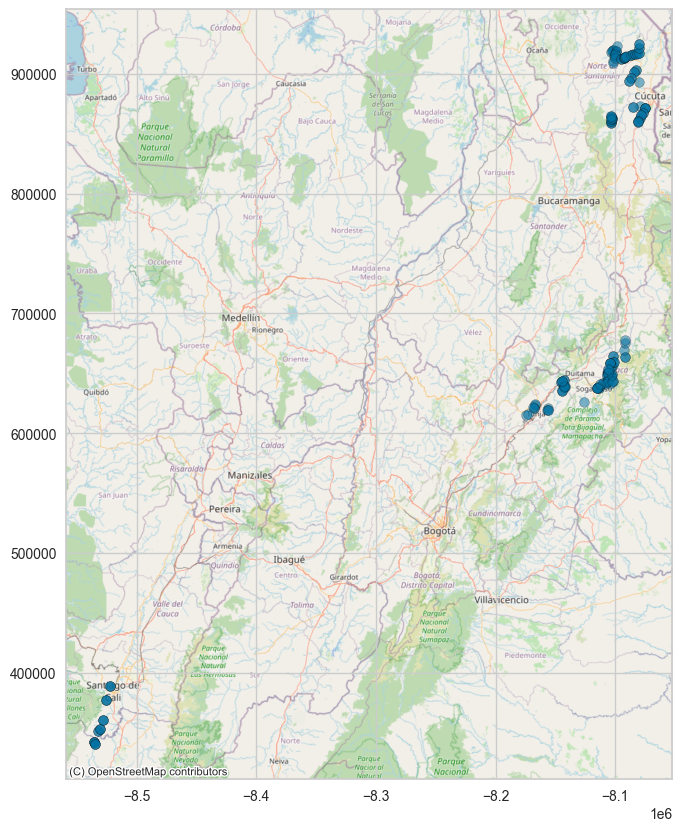

In [204]:
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

In [182]:
#This map can't see on GitHub

m = folium.Map([5.5, -74.5], tiles="Stamen Toner",  zoom_start=8)
 
folium.Choropleth(
    gdf,
    icon=folium.Icon(color='red'),
    line_color='blue'
).add_to(m)

m

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [90]:
type(Y_target)

pandas.core.series.Series

In [13]:
categorical_cols = [col for col in X_data.columns if X_data[col].dtype == 'object']

In [102]:
oneHot_Encoder = OneHotEncoder()
transformer = ColumnTransformer(transformers=[("OneHot", oneHot_Encoder, categorical_cols)], remainder='passthrough')
X_fit = transformer.fit_transform(X_data)

In [103]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)


In [104]:
clf.fit(X_fit, Y_target)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [4]:
iv.drop(columns=['COD_ZHF','COD_AHT','AHT','COD_DISPON','DISPONIBIL','COD_INFLUE','INFLUENCIA',
'COD_USO','USO_SUELO','COD_NORMA','NORMA_ACTU','AREA'],inplace= True)
iv['lon'] = iv.centroid.x
iv['lat'] = iv.centroid.y

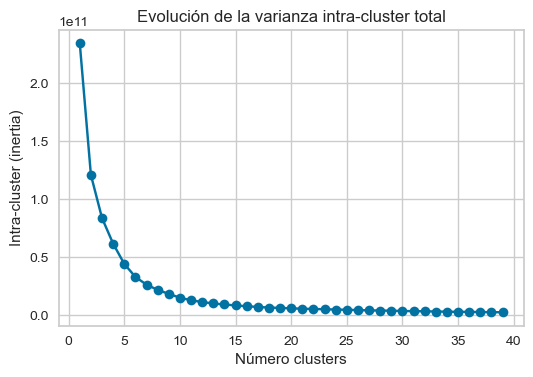

In [4]:
range_n_clusters = range(1, 40)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 25, 
                        random_state = 123
                    )
    modelo_kmeans.fit(iv[['lon','lat']])
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')
plt.show()

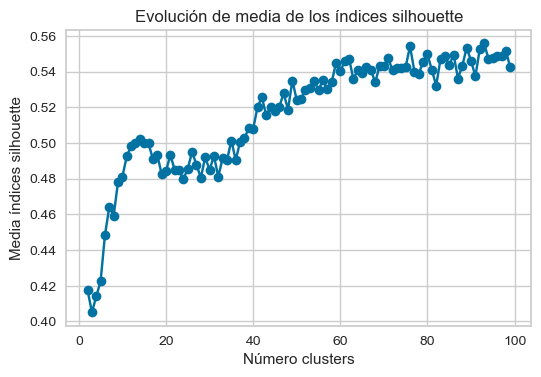

In [6]:
range_n_clusters = range(2, 100)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 25, 
                        random_state = 10
                    )
    cluster_labels = modelo_kmeans.fit_predict(iv[['lon','lat']])
    silhouette_avg = silhouette_score(iv[['lon','lat']], cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()

In [7]:
np.unique(cluster_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98],
      dtype=int32)

/home/camilocorredor/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/camilocorredor/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


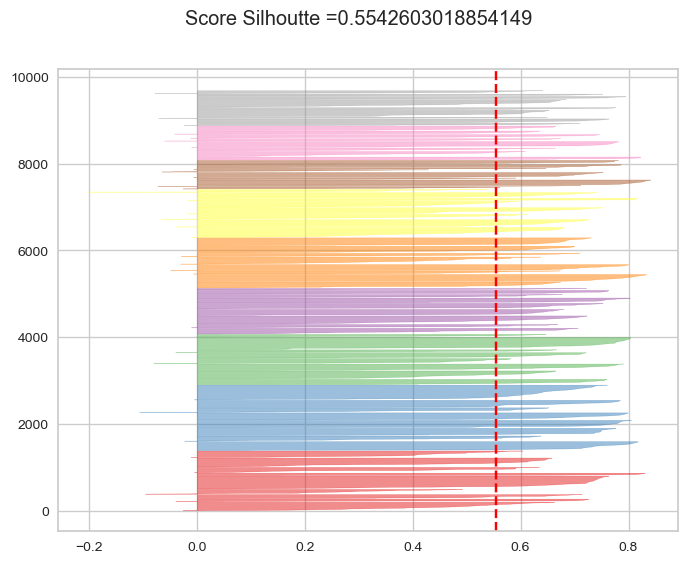

In [13]:
plt.figure(figsize=(8,6))
km = KMeans(n_clusters = 76, random_state = 10)
visualizer = SilhouetteVisualizer(km, color = 'yellowbrick')
visualizer.fit(iv[['lon','lat']])
cluster_labels = km.fit_predict(iv[['lon','lat']])
silhouette_avg_ = silhouette_score(iv[['lon','lat']], cluster_labels)
plt.suptitle(f'Score Silhoutte ={silhouette_avg_}')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=76, random_state=10)

In [15]:
y_pred = kmeans.fit_predict(iv[['lon','lat']])
iv['y_pred'] = pd.DataFrame(y_pred)
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1': k_means_centers[:,0],
        'y1': k_means_centers[:,1]
    }
)

/home/camilocorredor/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


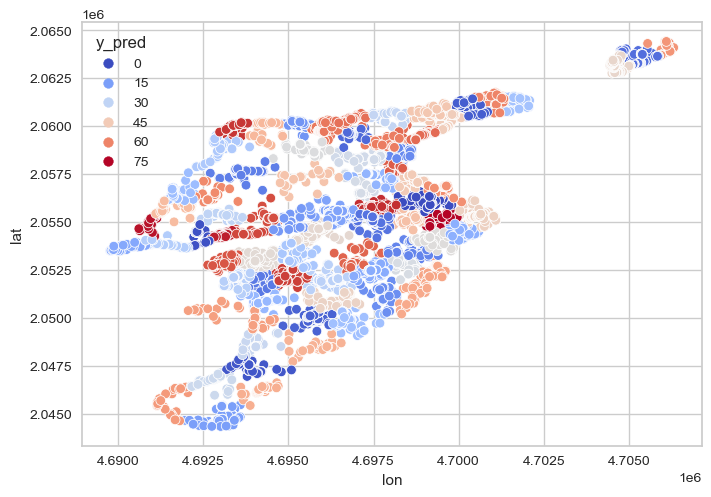

In [51]:
sns.scatterplot(data = iv, x = 'lon', y = 'lat', hue = 'y_pred', palette = 'coolwarm')
# sns.scatterplot(data = df_k_means_center, x = 'x1', y = 'y1', marker = 'X', s = 100, color = 'red')
plt.show()

Clustering Hierachical

<Figure size 1000x1000 with 0 Axes>

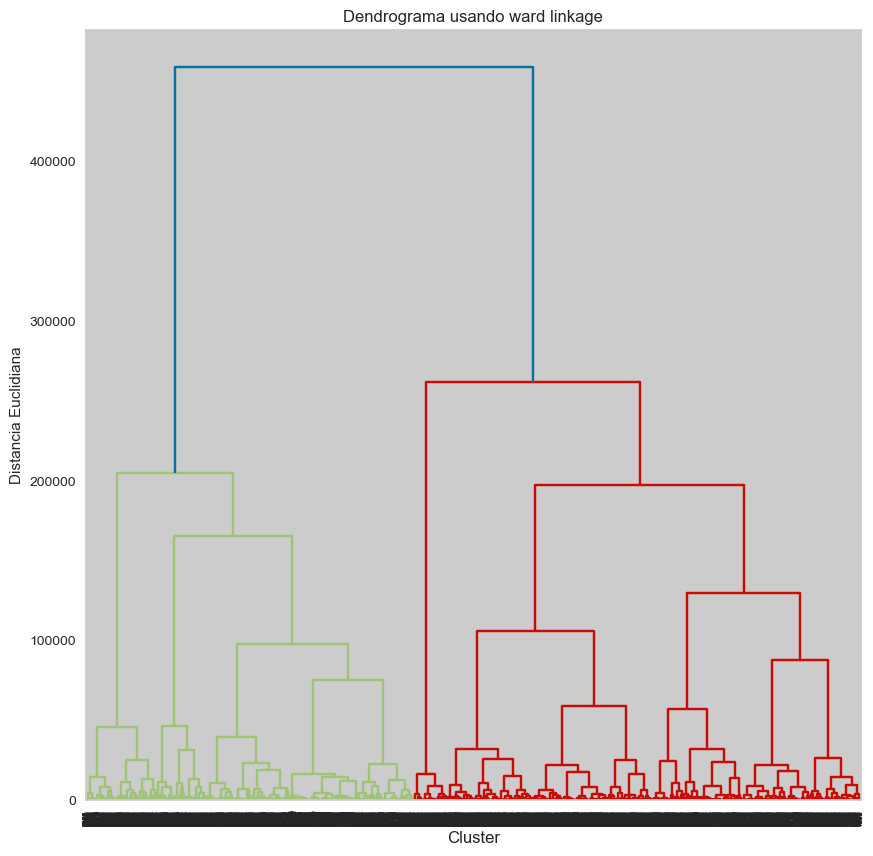

In [29]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(iv[['lon','lat']], method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia Euclidiana')
plt.show()

In [22]:
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0.1,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=iv[['lon','lat']])

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=iv[['lon','lat']])



/home/camilocorredor/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/camilocorredor/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/camilocorredor/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', distance_threshold=0,
                        n_clusters=None)

In [5]:
model_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            #distance_threshold = 0,
                            n_clusters = 100
                     )
model_hclust_ward = model_hclust_ward.fit_predict(X=iv[['lon','lat']])
iv['cluster'] = pd.DataFrame(model_hclust_ward)

/home/camilocorredor/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


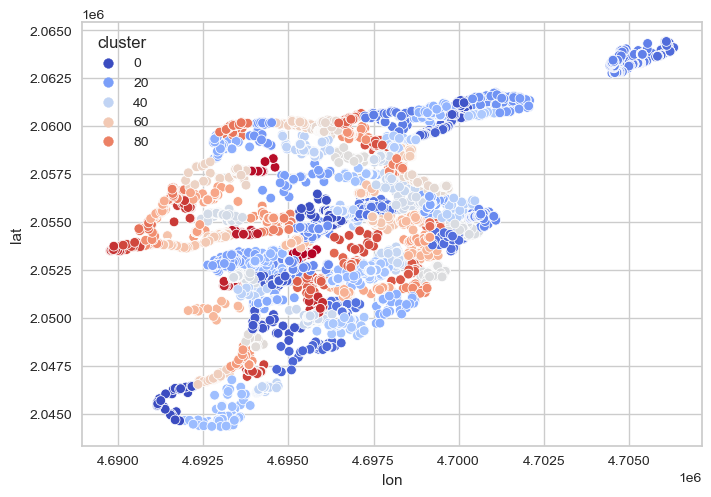

In [6]:
sns.scatterplot(data = iv, x = 'lon', y = 'lat', hue = 'cluster', palette = 'coolwarm')
plt.show()

In [7]:
silhouette_score(iv[['lon','lat']],model_hclust_ward)

0.5389649508287273

In [8]:
range_n_clusters = range(2, 100)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    
    model_hclust_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            #distance_threshold = 0,
                            n_clusters = n_clusters
                     )
    cluster_labels = model_hclust_ward.fit_predict(iv[['lon','lat']])
    silhouette_avg = silhouette_score(iv[['lon','lat']], cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()

KeyboardInterrupt: 

In [45]:
modelo_dbscan = DBSCAN(
                    eps          = 0.5,
                    min_samples  = 3,
                    metric       = 'euclidean',
                )

modelo_dbscan.fit(X=iv[['lon','lat']])

DBSCAN(min_samples=3)

In [46]:
labels = modelo_dbscan.labels_
labels.shape
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [47]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clusters encontrados: 16
Número de outliers encontrados: 8845


In [17]:
from sklearn.neighbors import NearestNeighbors

In [18]:
Neighbors = NearestNeighbors(n_neighbors= 3)
Neighbors_fit = Neighbors.fit(iv[['lon','lat']])
distances, indices = Neighbors_fit.kneighbors(iv[['lon','lat']])

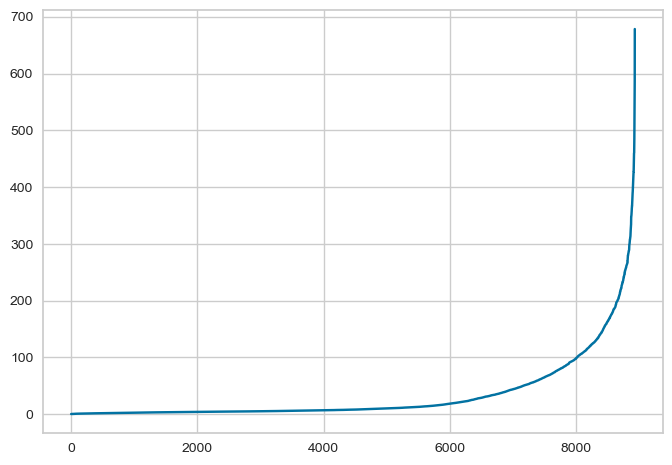

In [19]:
distances_ = np.sort(distances, axis = 0)
distances_ = distances_[:,2]
plt.plot(distances_)
plt.show()

In [20]:
from itertools import product

In [35]:
eps_values = np.arange(0.01, 2, 0.5)
min_samples = np.arange(2,10,1)

eps_values
min_samples

array([2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
X = iv[['lon','lat']]

In [37]:
dbscan_paramns = list(product(eps_values,min_samples))
sil_scores = []
labels = 0
idx_elim = []
i = 0

for p in dbscan_paramns: 
    y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X),
    y_pred = np.array(y_pred).ravel()
    if len(np.unique(y_pred)) < 2:
        print(f'Parameters: {p[0]} and {p[1]}. Index: {i}')
        idx_elim.append(i)
        
    else:
        sil_scores.append(silhouette_score(X,y_pred))
    
    i += 1



Parameters: 0.01 and 3. Index: 1
Parameters: 0.01 and 4. Index: 2
Parameters: 0.01 and 5. Index: 3
Parameters: 0.01 and 6. Index: 4
Parameters: 0.01 and 7. Index: 5
Parameters: 0.01 and 8. Index: 6
Parameters: 0.01 and 9. Index: 7


In [38]:
for x in idx_elim:
    dbscan_paramns.pop(x)

In [39]:
df_params_tuning = []

In [41]:
df_params_tuning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps','Min_Samples'])
df_params_tuning['sil_scores'] = sil_scores

pivot_data = pd.pivot_table(df_params_tuning, values='sil_scores',index='Min_Samples',columns='Eps')
pivot_data


Eps,0.01,0.51,1.01,1.51
Min_Samples,,,,
2,0.057229,-0.146420,-0.796165,-0.737360
3,NaN,NaN,-0.760493,-0.750236
4,-0.826735,-0.134291,-0.671501,-0.749544
5,NaN,NaN,-0.559471,-0.740582
6,-0.642979,-0.134512,-0.424241,-0.558202
7,NaN,NaN,-0.425368,-0.423653
8,-0.428619,-0.134512,-0.143746,-0.423748
9,NaN,-0.134512,-0.143970,-0.424916


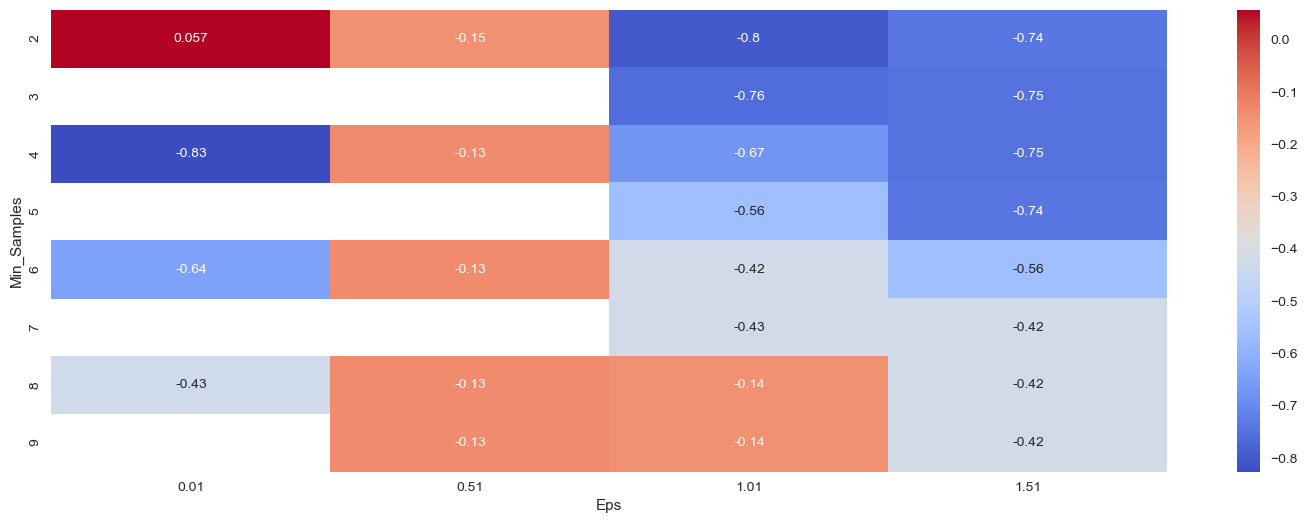

In [42]:
fig, ax  = plt.subplots(figsize =(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax = ax)
plt.show()

In [50]:
len(ith_cluster_silhouette_values)

NameError: name 'ith_cluster_silhouette_values' is not defined

In [49]:
len(X)

8930

In [21]:
x_full = np.concatenate((X_1,labels),axis=1)

In [22]:
x_full

array([[4.69685923e+06, 2.04989197e+06, 0.00000000e+00],
       [4.69691084e+06, 2.04989189e+06, 2.00000000e+00],
       [4.69684568e+06, 2.04988960e+06, 0.00000000e+00],
       ...,
       [4.69743144e+06, 2.05245274e+06, 1.08000000e+02],
       [4.69741814e+06, 2.05244969e+06, 1.08000000e+02],
       [4.69742144e+06, 2.05245036e+06, 1.08000000e+02]])

In [23]:
x_full = pd.DataFrame(x_full)

In [24]:
x_full

,0,1,2
0,4.696859e+06,2.049892e+06,0.0
1,4.696911e+06,2.049892e+06,2.0
2,4.696846e+06,2.049890e+06,0.0
3,4.696918e+06,2.049889e+06,3.0
4,4.696878e+06,2.049895e+06,1.0
...,...,...,...
8925,4.697408e+06,2.052448e+06,108.0
8926,4.697428e+06,2.052452e+06,108.0
8927,4.697431e+06,2.052453e+06,108.0
8928,4.697418e+06,2.052450e+06,108.0


In [26]:
x_full.to_excel('/home/camilocorredor/Documents/Catastro_Armenia/12 Diciembre/Cluster/DataFrame.xlsx')

In [29]:
x_full.groupby(2).size()

2
-1.0      5235
 0.0       141
 1.0         6
 2.0         5
 3.0        12
          ... 
 271.0       8
 272.0      41
 273.0       6
 274.0       5
 275.0       5
Length: 277, dtype: int64

In [119]:
import seaborn as sns

In [30]:
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

In [ ]:
map.add_child(
        folium.Marker(
            location=,
            popup=
            #     "Year: " + str(geo_df.Year[i]) + "<br>"
            #     + "Name: " + str(geo_df.Name[i]) + "<br>"
            #     + "Country: " + str(geo_df.Country[i]) + "<br>"
            #     + "Type: " + str(geo_df.Type[i]) + "<br>"
            #     + "Coordinates: " + str(geo_df_list[i]),
            # icon=folium.Icon(color="%s" % type_color),
        )
    )

/home/camilocorredor/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


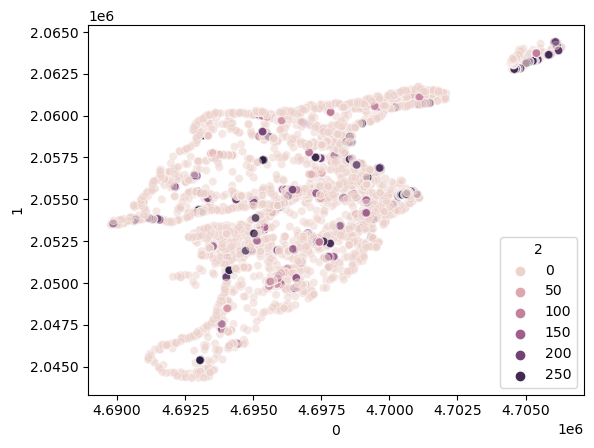

In [23]:
sns.scatterplot(data = iv, x = 'lon', y = 'lat', hue = 'cluster', palette = 'coolwarm')
plt.show()